# **Sentiment Analysis on [IMDB Dataset of 50K Movie Reviews](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/data)**

## 🚀 **Let's Connect!**
<p align="left"> <a href="https://github.com/chiragpc2004" target="_blank"> <img src="https://img.shields.io/badge/GitHub-%23181717.svg?&style=for-the-badge&logo=github&logoColor=white" alt="GitHub"/> </a> <a href="https://www.linkedin.com/in/chiragpc2004/" target="_blank"> <img src="https://img.shields.io/badge/LinkedIn-%230077B5.svg?&style=for-the-badge&logo=linkedin&logoColor=white" alt="LinkedIn"/> </a> <a href="https://mail.google.com/mail/?view=cm&fs=1&to=chiragpc2004@gmail.com" target="_blank"> <img src="https://img.shields.io/badge/Gmail-%23D14836.svg?&style=for-the-badge&logo=gmail&logoColor=white" alt="Gmail"/> </a> </p>

## **Machine Learning Models**

Now that we have our data cleaned, preprocessed, and split into training and testing sets, we are ready to begin model building and training. To understand the performance across different levels of model complexity, we will experiment with three ML models as follows:

1. **Logistic Regression** – A simple and interpretable linear model that serves as a solid baseline.
2. **Naive Bayes** – Another lightweight model particularly effective for text classification tasks.
3. **Gradient Boosting** – A powerful ensemble technique that combines weak learners to form a strong predictor.

This progression will help us analyse the effectiveness of traditional machine learning algorithms for sentiment classification.

#### Import statements

In [60]:
# Core and Data Handling
import pandas as pd
import numpy as np

# Encoding and Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# Model Training and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb # type: ignore
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [61]:
# Read the dataset
df = pd.read_csv("D:/imdb-sentiment-classifier/data/processed/cleaned_data.csv")
df.head()

,review,sentiment
0,one reviewer mentioned watching oz episode you...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically there family little boy jake think t...,0
4,petter matteis love time money visually stunni...,1


### Data Preparation

#### Vectorization

In [62]:
# Vectorization for Machine Learning models
vectorizer = TfidfVectorizer()
X_ml = vectorizer.fit_transform(df['review'])

#### Train Test Split
To evaluate the performance of our sentiment classification model effectively, we split the dataset into training and testing sets using an 80-20 ratio. This ensures that the model is trained on a majority of the data while still being evaluated on an unseen portion, helping us assess its generalization ability. The train_test_split function from Scikit-learn was used for this purpose, with stratification based on sentiment labels to maintain the original class distribution in both subsets. This stratified split prevents data imbalance issues and provides a more reliable estimate of the model’s real-world performance.

In [63]:
X = X_ml
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

#### **1. Logistic Regression**

In [64]:
lr = LogisticRegression(random_state=42) #Build a model
lr.fit(X_train, y_train) #Train the model
y_pred = lr.predict(X_test) #Make predictions

In [65]:
# Print accuracy
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy Score: 0.8919027931834224
Confusion Matrix:
[[4327  612]
 [ 460 4518]]


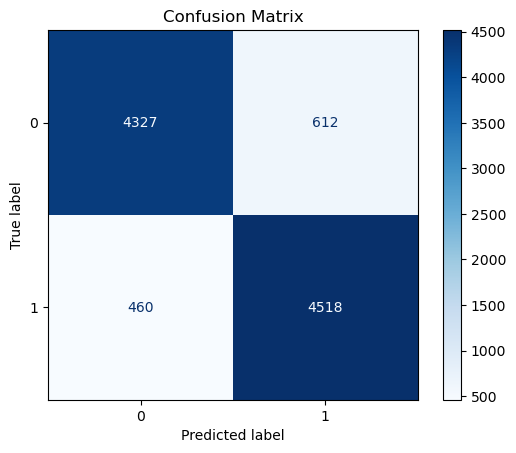

In [66]:
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

#### **2. Naive Bayes Classifier**

In [67]:
nb = MultinomialNB() #Build a model
nb.fit(X_train, y_train) #Train the model
y_pred = nb.predict(X_test) #Make predictions

In [68]:
# Print accuracy
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy Score: 0.8634667742260764
Confusion Matrix:
[[4293  646]
 [ 708 4270]]


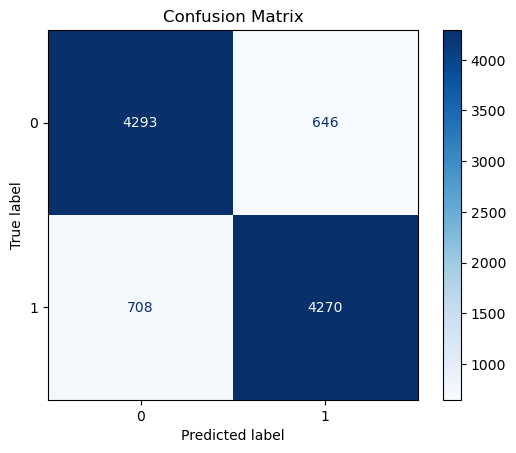

In [69]:
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

#### **3. Gradient Boosting using XGBoost**

In [70]:
xg = xgb.XGBClassifier(n_jobs=-1) #Build a model
xg.fit(X_train, y_train) #Train the model
y_pred = xg.predict(X_test) #Make predictions

In [71]:
# Print accuracy
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy Score: 0.848240395280831
Confusion Matrix:
[[4049  890]
 [ 615 4363]]


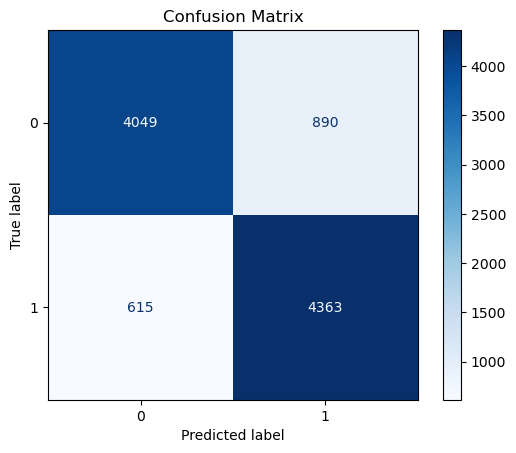

In [73]:
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

### **Prediction based on new data**

In [72]:
def classify_message(model, vectorizer, message):
     # Traditional ML (LR, NB, XGBoost)
    message_vect = vectorizer.transform([message])
    prediction = model.predict(message_vect)
    return "Positive" if prediction[0] == 1 else "Negative"

message = "The movie was so good"
print(classify_message(lr, vectorizer, message))
print(classify_message(nb, vectorizer, message))
print(classify_message(xg, vectorizer, message))

Positive
Positive
Positive
